In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import numpy as np

In [2]:
import gym
from gym import spaces
import random
from collections import deque, defaultdict

In [3]:
from glob import glob

In [4]:
import pickle

In [5]:
import json

In [6]:
def categorical_to_number(data, variables):
    """
    Receives a list of variables and a dataset for replacement of categorical values by numbers.
    Outputs dictionaries with the old values and teh new ones.
    """
    
    for v in variables:
        values = list(set(data[v]))
        values = [x for x in values if pd.notna(x)]
        values.sort()
        replace = {value: idx for idx, value in enumerate(values)}
        data[v].replace(replace, inplace = True)
        v = v.replace("/","_")
        with open(f'{v}.json','w') as file:
            json.dump(replace, file, indent = 4)
    return data

In [7]:
# Load the dataset
file_path1 = glob(f"./day*.csv")
file_path2 = glob(f"./poison*.csv")

In [8]:
file_path2[0][18:]

''

In [9]:
file_path1 = sorted(file_path1, key=lambda x: int(x[5:].split('.')[0]))

In [10]:
file_path1

['./day8.csv',
 './day9.csv',
 './day10.csv',
 './day11.csv',
 './day12.csv',
 './day13.csv',
 './day14.csv']

In [11]:
file_path2 = sorted(file_path2, key=lambda x: int(x[8:].split('.')[0]))
file_path2

['./poison8.csv',
 './poison9.csv',
 './poison10.csv',
 './poison11.csv',
 './poison12.csv',
 './poison13.csv',
 './poison14.csv']

In [12]:
data1 = [pd.read_csv(x) for x in file_path1]
data2 = [pd.read_csv(x) for x in file_path2]

In [13]:
def preprocess_data(df):
    df['Weekday/Weekend'] = df['Weekday/Weekend'].replace({"Weekday": 0, "Weekend": 1})
    df = categorical_to_number(df,['Hour'])
    # Extract state and action data
    state_data = df[['Hour', 'Weekday/Weekend','Presence Detector', 'Face Recognition', 'Weapon Recognition']].values
    actions = df['Action'].values
    
    return state_data, actions

In [14]:
# Preprocess the dataset
#state_data_N, actions_N = preprocess_data(data1)
state_data_N = []
actions_N = []
ds = data1.copy()
for d in ds:
    a, b = preprocess_data(d)
    state_data_N.append(a)
    actions_N.append(b)
    

In [15]:
state_data_N

[array([[  0,   0,   0,   0,   0],
        [  1,   0,   0,   0,   0],
        [  2,   0,   0,   0,   0],
        [  3,   0,   0,   0,   0],
        [  4,   0,   0,   0,   0],
        [  5,   0,   0,   0,   0],
        [  6,   0,   0,   0,   0],
        [  7,   0,   0,   0,   0],
        [  8,   0,   0,   0,   0],
        [  9,   0,   0,   0,   0],
        [ 10,   0,   0,   0,   0],
        [ 11,   0,   0,   0,   0],
        [ 12,   0,   0,   0,   0],
        [ 13,   0,   0,   0,   0],
        [ 14,   0,   0,   0,   0],
        [ 15,   0,   0,   0,   0],
        [ 16,   0,   0,   0,   0],
        [ 17,   0,   0,   0,   0],
        [ 18,   0,   0,   0,   0],
        [ 19,   0,   0,   0,   0],
        [ 20,   0,   0,   0,   0],
        [ 21,   0,   0,   0,   0],
        [ 22,   0,   0,   0,   0],
        [ 23,   0,   0,   0,   0],
        [ 24,   0,   0,   0,   0],
        [ 25,   0,   0,   0,   0],
        [ 26,   0,   0,   0,   0],
        [ 27,   0,   0,   0,   0],
        [ 28,   0,  

In [16]:
len(state_data_N[6])

144

In [17]:
len(state_data_N)

7

In [18]:
actions_N

[array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 array([0, 0, 0, 0, 

In [19]:
# Preprocess the dataset
#state_data_P, actions_P = preprocess_data(data2)
state_data_P = []
actions_P = []
ds2 = data2.copy()
for d in ds2:
    a, b = preprocess_data(d)
    state_data_P.append(a)
    actions_P.append(b)
    

In [20]:
state_data_P

[array([[  0,   0,   0,   0,   0],
        [  1,   0,   0,   0,   0],
        [  2,   0,   0,   0,   0],
        [  3,   0,   0,   0,   0],
        [  4,   0,   0,   0,   0],
        [  5,   0,   0,   0,   0],
        [  6,   0,   0,   0,   0],
        [  7,   0,   0,   0,   0],
        [  8,   0,   0,   0,   0],
        [  9,   0,   0,   0,   0],
        [ 10,   0,   0,   0,   0],
        [ 11,   0,   0,   0,   0],
        [ 12,   0,   0,   0,   0],
        [ 13,   0,   0,   0,   0],
        [ 14,   0,   0,   0,   0],
        [ 15,   0,   0,   0,   0],
        [ 16,   0,   0,   0,   0],
        [ 17,   0,   0,   0,   0],
        [ 18,   0,   0,   0,   0],
        [ 19,   0,   0,   0,   0],
        [ 20,   0,   0,   0,   0],
        [ 21,   0,   0,   0,   0],
        [ 22,   0,   0,   0,   0],
        [ 23,   0,   0,   0,   0],
        [ 24,   0,   0,   0,   0],
        [ 25,   0,   0,   0,   0],
        [ 26,   0,   0,   0,   0],
        [ 27,   0,   0,   0,   0],
        [ 28,   0,  

In [21]:
#np.zeros(state_data_N[0].shape[1])

In [22]:
class RealTimeEnvironment(gym.Env):
    def __init__(self, state_data_N, actions_N, state_data_P, actions_P):
        super(RealTimeEnvironment, self).__init__()
        self.state_data_N = state_data_N
        self.actions_data_N = actions_N
        self.state_data_P = state_data_P
        self.actions_data_P = actions_P
        self.current_step = 0
        self.correct = []
        self.index = 0

        # Define observation space (4 features: Timestamp, Presence Sensor, Persons Recognized, Weapon Detected)
        self.observation_space = spaces.Box(low=0, high=1, shape=(4,), dtype=np.float32)
        
        # Action space: 2 actions (0: do nothing, 2: inform owner and police)
        self.action_space = spaces.Discrete(2)
        
    def reset_N(self):
        self.current_step = 0
        if self.index < 6:
            self.index += 1
        else:
            self.index = 0
        #print(f"self.index = {self.index}")
        return self.state_data_N[self.index][self.current_step]
    
    def reset_P(self):
        self.current_step = 0
        self.current_step = 0
        if self.index < 6:
            self.index += 1
        else:
            self.index = 0
        return self.state_data_P[self.index][self.current_step]

    def step_N(self, action):
        correct_action = int(self.actions_data_N[self.index][self.current_step])
        #print(f"Action: {action} --- Gabarito: {correct_action}")
        self.correct.append(correct_action)
        #reward = 1 if action == correct_action else -1
        if action == correct_action:
            if action == 1:
                reward = 20
            else:
                reward = 1
        else:
            if action == 0 and correct_action  == 1:
                reward = -20
            else:
                reward = -1
        
        # Move to the next step
        self.current_step += 1
        done = self.current_step >= len(self.state_data_N[self.index])
        
        # Get the next state
        if not done:
            next_state = self.state_data_N[self.index][self.current_step]
        else:
            next_state = np.zeros(self.state_data_N[self.index].shape[1])
            if self.index <= 6:
                self.index += 1
            else:
                self.index = 0
            #next_state = self.state_data_N[self.index][0]
        return next_state, reward, done, {}
    
    def step_P(self, action):
        #correct_action = int(self.actions_data_P[self.index][self.current_step])
        correct_action = int(self.actions_data_P[self.index][self.current_step])
        self.correct.append(correct_action)
        
        if action == correct_action:
            if action == 1:
                reward = 20
            else:
                reward = 1
        else:
            if action == 0 and correct_action  == 1:
                reward = -20
            else:
                reward = -1
        
        # Move to the next step
        self.current_step += 1
        done = self.current_step >= len(self.state_data_P[self.index])
        
        # Get the next state
        if not done: 
            next_state = self.state_data_P[self.index][self.current_step]
        else:
            next_state = np.zeros(self.state_data_N[self.index].shape[1])
            #next_state = np.zeros(self.state_data_P.shape[1])
            
        
        return next_state, reward, done, {}
    
    def render_N(self):
        print(f"Step: {self.current_step}, State: {self.state_data_N[self.current_step]}")
        
    def render_P(self):
        print(f"Step: {self.current_step}, State: {self.state_data_P[self.current_step]}")

In [23]:
# Initialize the environment
env = RealTimeEnvironment(state_data_N, actions_N, state_data_P, actions_P)

In [24]:
env.index

0

In [25]:
# Initialize Q-table using a defaultdict for easy default values
#q_table = defaultdict(lambda: [0, 0])  # Two actions, initialized to zero

In [26]:
with open("q_table_poison.pkl", "rb") as f:
    q_table = pickle.load(f)

In [27]:
# Reconvertendo para defaultdict
q_table = defaultdict(lambda: [0, 0], q_table)

In [28]:
q_table

defaultdict(<function __main__.<lambda>()>,
            {(1, 0, 0, 0, 0): [45.671686417731166, 26.127796927868594],
             (0, 0, 0, 0, 0): [45.73503349226324, 23.161241719733326],
             (2, 0, 0, 0, 0): [45.61065398803589, 20.00794260425235],
             (3, 0, 0, 0, 0): [45.55150866725671, 24.860470886408937],
             (4, 0, 0, 0, 0): [45.494170204122284, 20.58288096579773],
             (5, 0, 0, 0, 0): [45.43642589612785, 22.809328313096884],
             (6, 0, 0, 0, 0): [45.37264081408493, 22.612878263785205],
             (7, 0, 0, 0, 0): [45.31338173817968, 24.615831779800693],
             (8, 0, 0, 0, 0): [45.2888613813204, 23.402099878994154],
             (9, 0, 0, 0, 0): [45.23656220658434, 25.2236702867962],
             (10, 0, 0, 0, 0): [45.18496196707554, 20.985583327371888],
             (11, 0, 0, 0, 0): [45.13716233068325, 21.012759108865744],
             (12, 0, 0, 0, 0): [45.094236555137044, 25.0886490213328],
             (13, 0, 0, 0, 0): [45

In [67]:
#q_table = dict(sorted(q_table.items()))

In [68]:
#q_table

In [69]:
#state_discretizer = (10, 2, 2, 2)

In [29]:
poison = False
state = env.reset_N() if poison == False else env.reset_P()
state = tuple(state)
done = False
env.index = 0
# Metrics for tracking performance
reward_history = deque(maxlen=2016)
action_accuracy = deque(maxlen=2016)

In [30]:
env.index

0

In [31]:
avg_reward = []
suc_rate = []
epsilon = []
index = 0
episode = 0
episode_reward = 0
while True:
    
    #print(f"Episode reward : {episode_reward}")
    # Escolher a melhor ação (exploração)
    action = np.argmax(q_table[tuple(state)])
#    action = np.argmax(q_table[state])
    
    # Realizar a ação no ambiente
    next_state, reward, done, _ = env.step_N(action) if poison == False else env.step_P(action)  # Use step_P para outro cenário
    next_state = tuple(next_state)

    #print(f"Estado: {state}, Ação: {action}, Recompensa: {reward}")
    state = next_state
    episode_reward += reward
    #action_accuracy.append(1 if reward == 1 else 0)  # Track if action was correct
    action_accuracy.append(1 if reward > 0 else 0)  # Track if action was correct
    if reward < 0:
        print(f"state = {state} \n action = {q_table[tuple(state)]} \n Reward = {reward} ")
    
    
    if episode == 500:
        poison = True
    if episode > 900:
        poison = False
    
    if index % 143 == 0 and index != 0:
        
        reward_history.append(episode_reward)
        average_reward = np.mean(reward_history)
        success_rate = np.mean(action_accuracy)
        avg_reward.append(average_reward)
        suc_rate.append(success_rate)
        print(f"Episode {episode}: Avg Reward = {average_reward:.4f}, Success Rate = {success_rate:.4f}")
        episode += 1
        state = env.reset_N() if poison == False else env.reset_P()
        episode_reward = 0
        
    if episode == 1000:
        break 
    
    index += 1   

Episode 0: Avg Reward = 182.0000, Success Rate = 1.0000
Episode 1: Avg Reward = 181.5000, Success Rate = 1.0000
Episode 2: Avg Reward = 244.6667, Success Rate = 1.0000
Episode 3: Avg Reward = 247.7500, Success Rate = 1.0000
Episode 4: Avg Reward = 283.8000, Success Rate = 1.0000
Episode 5: Avg Reward = 383.8333, Success Rate = 1.0000
Episode 6: Avg Reward = 354.8571, Success Rate = 1.0000
Episode 7: Avg Reward = 333.1250, Success Rate = 1.0000
Episode 8: Avg Reward = 316.2222, Success Rate = 1.0000
Episode 9: Avg Reward = 321.7000, Success Rate = 1.0000
Episode 10: Avg Reward = 315.8182, Success Rate = 1.0000
Episode 11: Avg Reward = 325.1667, Success Rate = 1.0000
Episode 12: Avg Reward = 368.1538, Success Rate = 1.0000
Episode 13: Avg Reward = 354.7857, Success Rate = 1.0000
Episode 14: Avg Reward = 343.2000, Success Rate = 1.0000
Episode 15: Avg Reward = 333.0625, Success Rate = 1.0000
Episode 16: Avg Reward = 335.2941, Success Rate = 1.0000
Episode 17: Avg Reward = 330.9444, Succes

Episode 359: Avg Reward = 353.7972, Success Rate = 1.0000
Episode 360: Avg Reward = 353.5291, Success Rate = 1.0000
Episode 361: Avg Reward = 353.7348, Success Rate = 1.0000
Episode 362: Avg Reward = 355.1956, Success Rate = 1.0000
Episode 363: Avg Reward = 354.7170, Success Rate = 1.0000
Episode 364: Avg Reward = 354.2411, Success Rate = 1.0000
Episode 365: Avg Reward = 353.7678, Success Rate = 1.0000
Episode 366: Avg Reward = 353.8147, Success Rate = 1.0000
Episode 367: Avg Reward = 353.5516, Success Rate = 1.0000
Episode 368: Avg Reward = 353.7534, Success Rate = 1.0000
Episode 369: Avg Reward = 355.1865, Success Rate = 1.0000
Episode 370: Avg Reward = 354.7170, Success Rate = 1.0000
Episode 371: Avg Reward = 354.2500, Success Rate = 1.0000
Episode 372: Avg Reward = 353.7855, Success Rate = 1.0000
Episode 373: Avg Reward = 353.8316, Success Rate = 1.0000
Episode 374: Avg Reward = 353.5733, Success Rate = 1.0000
Episode 375: Avg Reward = 353.7713, Success Rate = 1.0000
Episode 376: A

In [32]:
import matplotlib.pyplot as plt

In [33]:
episodes = [x for x in range(0,1000,20)]

In [34]:
avg = [x for x in avg_reward[::20]]

No handles with labels found to put in legend.


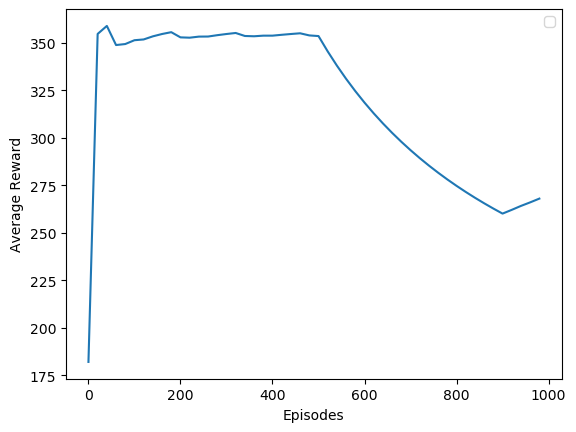

In [36]:
plt.plot(episodes,avg)
plt.xlabel('Episodes')
plt.ylabel('Average Reward')
plt.legend()
plt.savefig("Avg_poison_inference.png")

In [37]:
suc = [x for x in suc_rate[::20]]

No handles with labels found to put in legend.


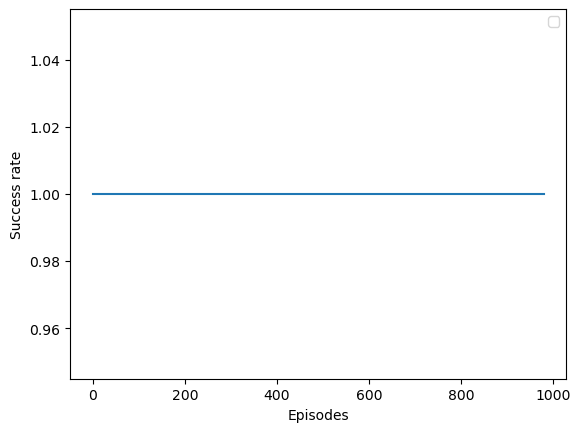

In [38]:
plt.plot(episodes,suc)
plt.xlabel('Episodes')
plt.ylabel('Success rate')
plt.legend()
#plt.savefig("suc_poison.png")

In [125]:
len(epsilon)

1000

No handles with labels found to put in legend.


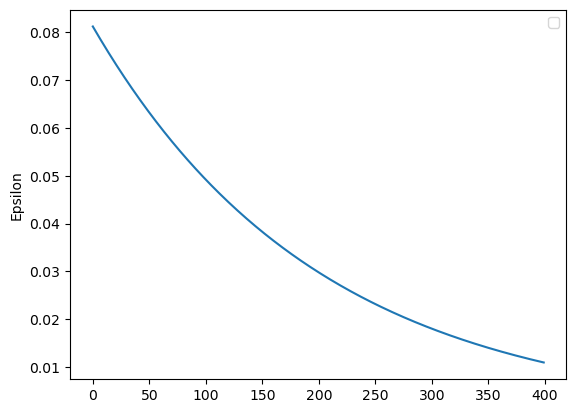

In [32]:
plt.plot(epsilon[500:900])
#plt.xlabel('Episodes')
plt.ylabel('Epsilon')
plt.legend()
plt.savefig("epsilon_normal.png")

In [56]:
epsilon[500:600]

[0.0811640021330769,
 0.08075818212241151,
 0.08035439121179945,
 0.07995261925574046,
 0.07955285615946175,
 0.07915509187866444,
 0.07875931641927113,
 0.07836551983717477,
 0.07797369223798889,
 0.07758382377679894,
 0.07719590465791494,
 0.07680992513462537,
 0.07642587550895225,
 0.07604374613140748,
 0.07566352740075044,
 0.07528520976374668,
 0.07490878371492794,
 0.0745342397963533,
 0.07416156859737154,
 0.07379076075438468,
 0.07342180695061275,
 0.07305469791585968,
 0.07268942442628039,
 0.07232597730414898,
 0.07196434741762824,
 0.0716045256805401,
 0.0712465030521374,
 0.0708902705368767,
 0.07053581918419231,
 0.07018314008827135,
 0.06983222438783,
 0.06948306326589085,
 0.0691356479495614,
 0.06878996970981359,
 0.06844601986126451,
 0.06810378976195819,
 0.0677632708131484,
 0.06742445445908266,
 0.06708733218678724,
 0.0667518955258533,
 0.06641813604822402,
 0.0660860453679829,
 0.06575561514114299,
 0.06542683706543727,
 0.06509970288011008,
 0.06477420436570952,


In [57]:
q_table

defaultdict(<function __main__.<lambda>()>,
            {(9, 0, 0, 0): [91.16156166492583, 88.48133165642888],
             (0, 0, 0, 0): [91.27154784104732, 88.52143034257763],
             (19, 0, 0, 0): [91.04949229718942, 88.49138593310467],
             (29, 0, 0, 0): [90.93841890586829, 88.26712503531989],
             (39, 0, 0, 0): [90.83114398540826, 88.35966305840863],
             (49, 0, 0, 0): [90.72795984687136, 88.30241489162998],
             (59, 0, 0, 0): [90.62723461335692, 88.39399966287282],
             (69, 0, 0, 0): [90.52472565439504, 88.51489432200268],
             (79, 0, 0, 0): [90.420706545015, 88.39523769225903],
             (89, 0, 0, 0): [90.3522295755977, 87.79095613415146],
             (99, 0, 0, 0): [90.19016527211195, 88.03987180257656],
             (109, 0, 0, 0): [89.40050732077955, 87.29515578810324],
             (119, 0, 0, 0): [91.6794757049803, 88.92880060146807],
             (129, 0, 0, 0): [91.58366825948409, 89.0338811458372],
        

In [75]:
def undiscetize_state(discretized_state, state_discretizer, state_ranges):
    """
    Convert a discretized tuple back into a continuous state.

    Args:
        discretized_state: Tuple representing the discretized state.
        state_discretizer: Tuple with the number of bins for each feature.
        state_ranges: List of tuples representing the (min, max) range for each feature.

    Returns:
        A list representing the continuous state.
    """
    continuous_state = []
    for i, value in enumerate(discretized_state):
        min_val, max_val = state_ranges[i]
        bin_size = (max_val - min_val) / state_discretizer[i]
        # Map the discretized value to the center of the bin
        continuous_value = min_val + (value + 0.5) * bin_size
        continuous_state.append(continuous_value)
    
    return continuous_state

In [76]:
state_ranges = [
    (0, 143),  # First feature range: 0 to 143
    (0, 1),    # Second feature range: 0 or 1
    (0, 4),    # Third feature range: 0 to 4
    (0, 1)     # Fourth feature range: 0 or 1
]

In [77]:
discretized_state = (689, 0, 0, 2)

In [78]:
undiscetize_state(discretized_state, state_discretizer, state_ranges)

[9859.85, 0.25, 1.0, 1.25]